## Informasi Mahasiswa

Nama: Muhammad Kemal Fasya

NPM : 2108107010052

Dataset dari kaggle https://www.kaggle.com/datasets/mirichoi0218/insurance/data

<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<font size='2'>Banyak faktor yang memengaruhi jumlah Anda membayar asuransi kesehatan berada di luar kendali Anda. Meskipun demikian, ada baiknya untuk memiliki pemahaman tentang apa itu. Berikut beberapa faktor yang mempengaruhi besarnya biaya premi asuransi kesehatan

* **usia:** usia penerima manfaat utama

* **jenis kelamin:** jenis kelamin kontraktor asuransi, perempuan, laki-laki

* **bmi:** Indeks massa tubuh, memberikan pemahaman tentang tubuh, berat badan yang relatif tinggi atau rendah relatif terhadap tinggi badan, indeks objektif berat badan (kg/m^2) menggunakan rasio tinggi terhadap berat badan, idealnya 18,5 hingga 24,9

* **anak-anak:** Jumlah anak yang ditanggung oleh asuransi kesehatan / Jumlah tanggungan

* **perokok:** Merokok

* **wilayah:** wilayah pemukiman penerima manfaat di AS, timur laut, tenggara, barat daya, barat laut

In [132]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Plot the dataset

## Data overview

In [133]:
df = pd.read_csv('dataset/regresi/insurance.csv')
df.head(10),df.shape

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520
 5   31  female  25.740         0     no  southeast   3756.62160
 6   46  female  33.440         1     no  southeast   8240.58960
 7   37  female  27.740         3     no  northwest   7281.50560
 8   37    male  29.830         2     no  northeast   6406.41070
 9   60  female  25.840         0     no  northwest  28923.13692,
 (1338, 7))

In [134]:
# Check some general information:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [135]:
# Decribe the data set
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data visuallization

In [136]:
List_input = ['age','bmi','children','charges']

In [137]:
bmi = df['bmi']
age = df['age']
charges  = df['charges']
children = df['children']

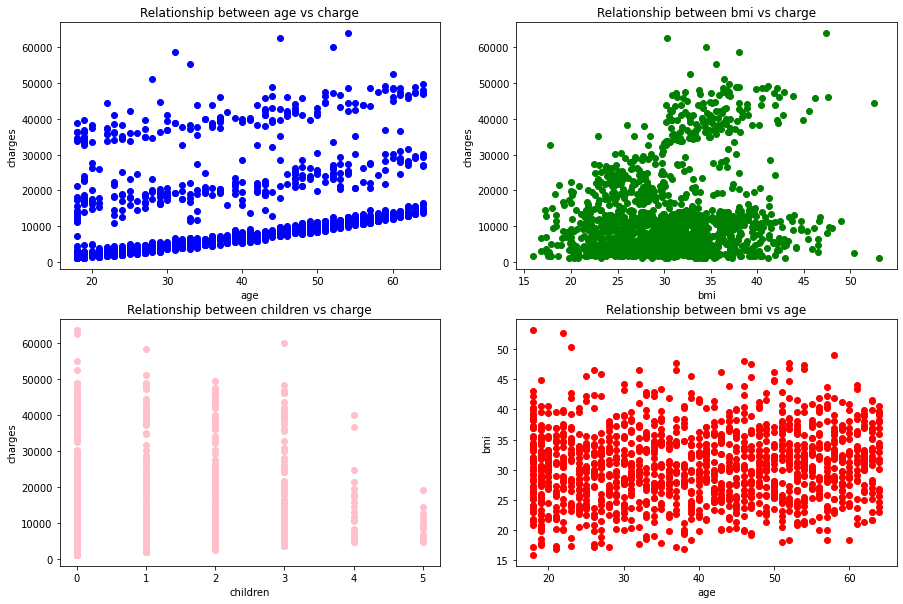

In [138]:
fig, ((ax1,ax2),(ax3,ax4))  = plt.subplots(nrows= 2, ncols=2, figsize =(15,10))

#Plot data to each axis:
ax1.scatter(age,charges, color = 'b');
ax2.scatter(bmi,charges, color = 'g');
ax3.scatter(children,charges, color = 'pink');
ax4.scatter(age,bmi, color = 'red');
            
ax1.set(title = 'Relationship between age vs charge', xlabel= 'age', ylabel='charges');
ax2.set(title = 'Relationship between bmi vs charge', xlabel= 'bmi', ylabel='charges');
ax3.set(title = 'Relationship between children vs charge', xlabel= 'children', ylabel='charges');
ax4.set(title = 'Relationship between bmi vs age', xlabel= 'age', ylabel='bmi');


##### there are three group in the age

In [139]:
age_group1 = df.loc[(df['charges'] > 0) & (df['charges'] < 13000)]
age_group2 = df.loc[(df['charges'] > 13000) & (df['charges'] < 28000)]
age_group3 = df.loc[(df['charges'] > 28000)]

In [140]:
def Exploxring_the_data(dataframe): 
    #Prepare the data
    bmi = dataframe['bmi']
    age = dataframe['age']
    charges  = dataframe['charges']
    children = dataframe['children']
    region = dataframe['region']
    smoking = dataframe['smoker']
    #Some looks
    a = dataframe.info()
    list_infor = [bmi.value_counts(),age.value_counts(),charges.value_counts(),children.value_counts(),region.value_counts(),smoking.value_counts()]

    fig, (ax1,ax2,ax3)  = plt.subplots(nrows= 1, ncols=3, figsize =(15,5))

    #Plot data to each axis:
    ax1.scatter(bmi,charges, color = 'g');
    ax2.scatter(children,charges, color = 'pink');
    ax3.scatter(age,bmi, color = 'red');

    ax1.set(title = 'Relationship between bmi vs charge', xlabel= 'bmi', ylabel='charges');
    ax2.set(title = 'Relationship between children vs charge', xlabel= 'children', ylabel='charges');
    ax3.set(title = 'Relationship between bmi vs age', xlabel= 'age', ylabel='bmi');
    
    return a,list_infor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       903 non-null    int64  
 1   sex       903 non-null    object 
 2   bmi       903 non-null    float64
 3   children  903 non-null    int64  
 4   smoker    903 non-null    object 
 5   region    903 non-null    object 
 6   charges   903 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 56.4+ KB


(None,
 [32.300    9
  28.880    7
  25.800    7
  30.875    6
  37.100    6
           ..
  28.820    1
  28.800    1
  32.400    1
  47.520    1
  21.120    1
  Name: bmi, Length: 455, dtype: int64,
  18    56
  19    46
  41    24
  26    24
  21    24
  46    23
  51    23
  38    23
  49    23
  28    22
  22    22
  45    22
  31    22
  48    21
  58    21
  56    21
  50    21
  53    20
  54    20
  44    20
  40    20
  25    20
  32    20
  55    19
  36    19
  42    19
  20    19
  24    19
  34    19
  33    19
  57    18
  52    18
  39    18
  29    18
  35    18
  30    17
  23    17
  47    17
  27    16
  37    14
  59    13
  43    12
  60     9
  62     4
  61     3
  Name: age, dtype: int64,
  1639.56310     2
  1824.28540     1
  11987.16820    1
  1627.28245     1
  10355.64100    1
                ..
  10461.97940    1
  4234.92700     1
  2775.19215     1
  4441.21315     1
  11305.93455    1
  Name: charges, Length: 902, dtype: int64,
  0    385
  1    233
  

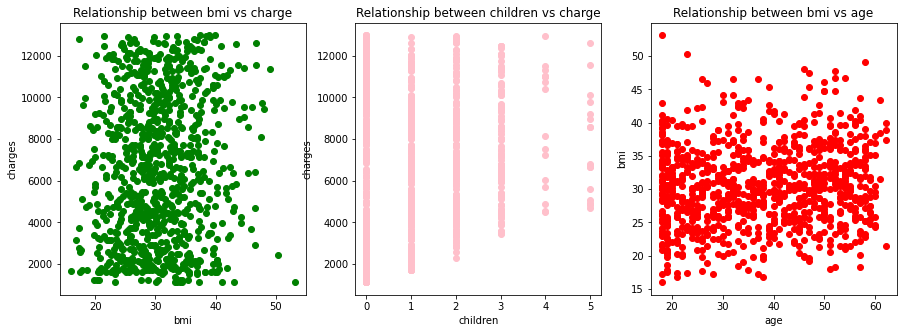

In [141]:
Exploxring_the_data(age_group1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    object 
 2   bmi       261 non-null    float64
 3   children  261 non-null    int64  
 4   smoker    261 non-null    object 
 5   region    261 non-null    object 
 6   charges   261 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.3+ KB


(None,
 [23.655    4
  24.320    3
  32.395    3
  27.830    3
  27.360    3
           ..
  24.600    1
  38.060    1
  36.300    1
  34.500    1
  33.110    1
  Name: bmi, Length: 200, dtype: int64,
  63    18
  64    16
  62    15
  61    13
  19    12
  43     9
  52     8
  27     8
  47     8
  60     7
  59     7
  18     7
  20     7
  29     7
  30     6
  23     6
  57     6
  39     6
  48     5
  24     5
  25     5
  53     5
  42     5
  35     5
  34     4
  33     4
  28     4
  32     4
  49     4
  50     4
  37     4
  21     4
  40     4
  54     4
  56     3
  58     3
  26     3
  55     3
  51     2
  46     2
  36     2
  45     2
  31     2
  41     1
  44     1
  38     1
  Name: age, dtype: int64,
  14210.53595    1
  13228.84695    1
  19040.87600    1
  15170.06900    1
  21677.28345    1
                ..
  19361.99880    1
  27808.72510    1
  13129.60345    1
  16450.89470    1
  13831.11520    1
  Name: charges, Length: 261, dtype: int64,
  0    119
  

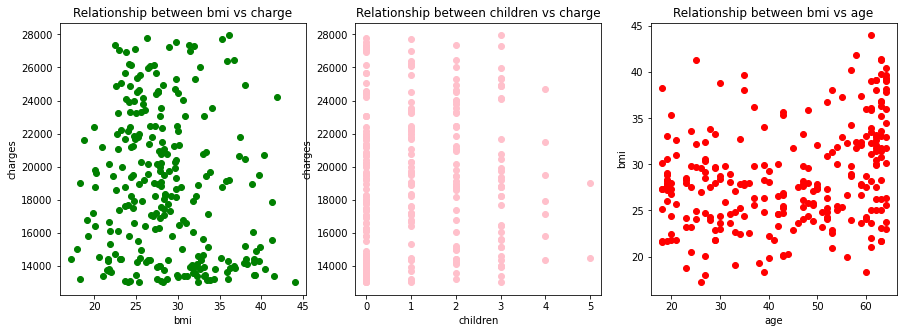

In [142]:
Exploxring_the_data(age_group2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 9 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       174 non-null    int64  
 1   sex       174 non-null    object 
 2   bmi       174 non-null    float64
 3   children  174 non-null    int64  
 4   smoker    174 non-null    object 
 5   region    174 non-null    object 
 6   charges   174 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.9+ KB


(None,
 [35.530    3
  34.800    3
  36.670    3
  38.060    3
  30.800    2
           ..
  26.885    1
  28.500    1
  47.410    1
  22.895    1
  36.190    1
  Name: bmi, Length: 136, dtype: int64,
  19    10
  37     7
  61     7
  60     7
  18     6
  44     6
  43     6
  64     6
  22     6
  63     5
  59     5
  45     5
  23     5
  27     4
  24     4
  62     4
  55     4
  54     4
  51     4
  50     4
  47     4
  46     4
  36     4
  30     4
  53     3
  20     3
  31     3
  33     3
  34     3
  25     3
  52     3
  42     3
  48     3
  40     3
  35     2
  28     2
  56     2
  57     2
  32     2
  29     2
  41     2
  49     1
  26     1
  58     1
  38     1
  39     1
  Name: age, dtype: int64,
  63770.42801    1
  36197.69900    1
  42112.23560    1
  36219.40545    1
  35160.13457    1
                ..
  32108.66282    1
  38792.68560    1
  39241.44200    1
  41661.60200    1
  60021.39897    1
  Name: charges, Length: 174, dtype: int64,
  0    70
  2

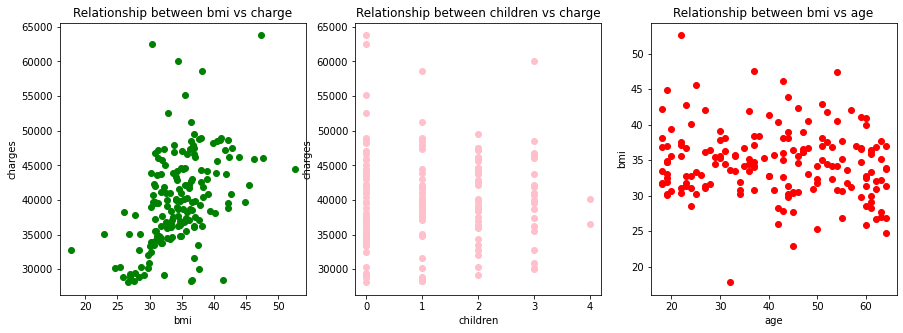

In [143]:
Exploxring_the_data(age_group3)

In [144]:
pattern_group2_no_smoke = age_group2.loc[(age_group2['smoker']=='no')]
pattern_group2_smoke = age_group2.loc[(age_group2['smoker']=='yes')]

bmi_no_smoke = pattern_group2_no_smoke['bmi']
bmi_smoke = pattern_group2_smoke['bmi']
charges_no_smoke = pattern_group2_no_smoke['charges']
charges_smoke = pattern_group2_smoke['charges']


pattern_group2_no_smoke['bmi'].value_counts(),pattern_group2_smoke['bmi'].value_counts()

(32.395    3
 33.100    2
 36.765    2
 30.590    2
 27.600    2
          ..
 31.020    1
 29.300    1
 39.710    1
 35.970    1
 36.190    1
 Name: bmi, Length: 121, dtype: int64,
 28.025    3
 24.420    3
 23.655    3
 24.130    2
 28.300    2
          ..
 25.175    1
 27.700    1
 24.400    1
 23.980    1
 29.800    1
 Name: bmi, Length: 97, dtype: int64)

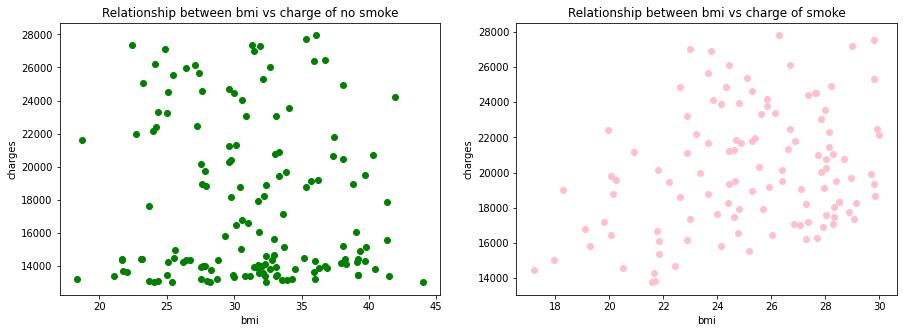

In [145]:
fig, (ax1,ax2)  = plt.subplots(nrows= 1, ncols=2, figsize =(15,5))

#Plot data to each axis:
ax1.scatter(bmi_no_smoke,charges_no_smoke, color = 'g');
ax2.scatter(bmi_smoke,charges_smoke, color = 'pink');


ax1.set(title = 'Relationship between bmi vs charge of no smoke', xlabel= 'bmi', ylabel='charges');
ax2.set(title = 'Relationship between bmi vs charge of smoke', xlabel= 'bmi', ylabel='charges');
    

### We can slightly conclude that: the people who have higher  medical charges tend to be the ones who smoke and overweight ( the bmi > 25)

### Preprocess the data

In [146]:
X = df.drop (['charges'],axis = 1)
y = df['charges']

X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [147]:
list_name = ['sex','smoker','region']
X = pd.get_dummies(X, prefix = list_name)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [148]:
X_new = X.drop(['sex_male','smoker_yes','region_southwest'],axis = 1)
X_new,y

(      age     bmi  children  sex_female  smoker_no  region_northeast  \
 0      19  27.900         0           1          0                 0   
 1      18  33.770         1           0          1                 0   
 2      28  33.000         3           0          1                 0   
 3      33  22.705         0           0          1                 0   
 4      32  28.880         0           0          1                 0   
 ...   ...     ...       ...         ...        ...               ...   
 1333   50  30.970         3           0          1                 0   
 1334   18  31.920         0           1          1                 1   
 1335   18  36.850         0           1          1                 0   
 1336   21  25.800         0           1          1                 0   
 1337   61  29.070         0           1          0                 0   
 
       region_northwest  region_southeast  
 0                    0                 0  
 1                    0           

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [150]:
X_train.shape,X_test.shape

((1070, 8), (268, 8))

In [151]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [152]:
X_train.shape,X_val.shape

((856, 8), (214, 8))

In [153]:
X_train.iloc[:,:3]

,age,bmi,children
172,18,15.960,0
361,35,30.500,1
866,18,37.290,0
606,27,25.175,0
514,39,28.300,1
...,...,...,...
544,54,30.210,0
1245,28,24.300,5
1053,47,29.800,3
51,21,33.630,2


## Standard Scaler

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:3] = sc.fit_transform(X_train.iloc[:,0:3])
X_test.iloc[:,0:3] = sc.transform(X_test.iloc[:,0:3])
X_val.iloc[:,0:3] = sc.transform(X_val.iloc[:,0:3])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [155]:
y_train = tf.expand_dims(y_train,1, name=None)
y_test = tf.expand_dims(y_test,1, name=None)
y_val = tf.expand_dims(y_val,1, name=None)

y_train.shape

TensorShape([856, 1])

In [156]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)
y_val = sc_y.transform(y_val)

In [157]:
X_train.shape

(856, 8)

## Min_Max_scaler

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train.iloc[:,0:3] = mn.fit_transform(X_train.iloc[:,0:3])
X_test.iloc[:,0:3] = mn.transform(X_test.iloc[:,0:3])
X_val.iloc[:,0:3] = mn.transform(X_val.iloc[:,0:3])

y_train = tf.expand_dims(y_train,1, name=None)
y_test = tf.expand_dims(y_test,1, name=None)
y_val = tf.expand_dims(y_val,1, name=None)

y_train.shape

mn_y = MinMaxScaler()
y_train = mn_y.fit_transform(y_train)
y_test = mn_y.transform(y_test)
y_val = mn_y.transform(y_val)

### Build the neural network

In [158]:
#1. Create the model:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(856, activation='relu'),
      #tf.keras.layers.Dense(700, activation='relu'),
      tf.keras.layers.Dense(400, activation='relu'),
      #tf.keras.layers.Dense(300, activation='relu'),
      #tf.keras.layers.Dense(200,activation='relu'),
      tf.keras.layers.Dropout(0.3),
      #tf.keras.layers.Dense(150,activation='relu'),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(100,activation='relu'),
      #tf.keras.layers.Dense(10,activation='relu'),
      tf.keras.layers.Dense(1)
], name='Excersice_1')

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics =['mse'])

# 3. Fit the model
model.fit(X_train,y_train,validation_data = (X_val, y_val),epochs = 200, batch_size = 60)

Epoch 1/200
15/15 [==============================] - 1s 21ms/step - loss: 0.7221 - mse: 0.9850 - val_loss: 0.6152 - val_mse: 0.8891
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6200 - mse: 0.9533 - val_loss: 0.4841 - val_mse: 0.8607
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 0.4893 - mse: 0.8355 - val_loss: 0.4282 - val_mse: 0.7610
Epoch 4/200
15/15 [==============================] - 0s 10ms/step - loss: 0.4913 - mse: 0.8529 - val_loss: 0.3748 - val_mse: 0.6539
Epoch 5/200
15/15 [==============================] - 0s 10ms/step - loss: 0.4339 - mse: 0.6962 - val_loss: 0.3532 - val_mse: 0.5633
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 0.4085 - mse: 0.6244 - val_loss: 0.3391 - val_mse: 0.5121
Epoch 7/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3720 - mse: 0.5298 - val_loss: 0.3159 - val_mse: 0.4425
Epoch 8/200
15/15 [==============================] - 0s 9ms/step - loss: 0.36

In [159]:
model.summary()

Model: "Excersice_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 856)               7704      
_________________________________________________________________
dense_26 (Dense)             (None, 400)               342800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 390,705
Trainable params: 390,705
Non-trainable params: 0
_________________________________________________________________


# Evaluate the model

In [160]:
y_pred = model.predict(X_test)
y_pred.shape

(268, 1)

In [161]:
y_pred_1 = tf.squeeze(y_pred)
y_test = tf.squeeze(y_test)
y_pred_1.shape,y_test.shape

(TensorShape([268]), TensorShape([268]))

In [162]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred_1)
a = mae
a

<tf.Tensor: shape=(), dtype=float32, numpy=0.14846367>

In [163]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred_1)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.12058311>

In [164]:
# R_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8904023781196018

## Save the model

In [165]:
#model.save('Model_ex1_1')

# Try SVR model

In [166]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [167]:
y_pred = regressor.predict(X_test)
y_pred.shape

(268,)

In [168]:
# R_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8852260854627915